# Statistical Analysis and Data Visualization:

## Notebook Outline: 
#### 1. Data Set
#### 2. Project Goal & Results
#### 3. Importing & Cleaning Data
#### 4. Statistical Analysis
#### 5. Plots

# 1. Data Set
For this project, I will examine arrest booking data provided by the city of Los Angeles. The 221 MB of data includes information on arrest location, date, and **charge code** as well as **arrestee age and sex** for 21 LAPD reporting districts from 2010 to present. A link to the data and the data description are provided below:

https://data.lacity.org/A-Safe-City/Arrest-Data-from-2010-to-Present/yru6-6re4



# 2. Project Goal & Findings
### Are certain crimes committed more frequently by males (or females), or is the male:female ratio of arrestees consistent regardless of crime?

Using the data on **arrestee sex** (M or F in "Sex Code") and **charge group** as a stand in for "crime" (homicide, burglary, etc. in "Charge Group Description"), I estimated the 2$\sigma$ confidence interval for the fraction of arrestees that were male (%Male) for each charge group. The results are plotted in Fig. 3 below, along with the fraction of male arrestees in the global data set (79%, dashed, black line). 

Figure 3 shows that the ratio of male:female arrestees changes significantly as a function of charge group. With the exception of the "driving under influence" group, the difference in the fraction of male arrestees between each charge group and the global data set is statistically significant.

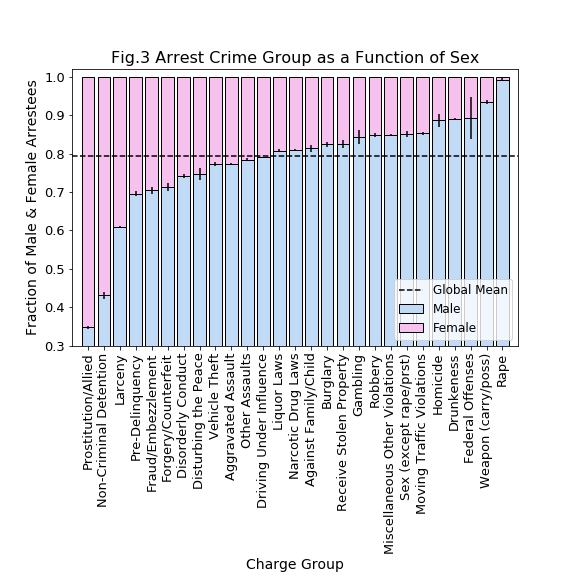

In [124]:
# For details on the making of Figure 3, see "Figure 3: Sex Code Bar Graph w/ 2sigma" below.
from IPython.display import Image
Image("Crime_group_Sex_BAR_2sigma.png")

If we assume that (a) there are the same number of males and females within these LAPD districts and (b) males and females are equally likely to be arrested for all crimes, we can conclude the following:
1. Males are arrested for more crimes than females. Relative risk assessment of the global data set suggests that males are 3.76 times more likely to be arrested than females.
2. Males and Females are arrested at different rates for different crimes.
The relative rates of arrest for males and females for each charge group are plotted in Figure 4 below. can be seen in the pie plots presenting in Fig 4 below. 

The higher arrest rate of males in the global data set is clearly depicted in Figure 4 by the large (>1) male/female arrest ratios (M/F Relative Rates). Figure 4 clearly shows that males are arrested at higher rates for all charge groups with the exception of Prostitution/Allied and Noncriminal Detention. 

Additionally, this presentation of the data makes it easy to spot charge groups which are most polarized by arrestee sex (far left of plot). Arrestees charged with Rape, Weapon, Federal Offense, Drunkenness, and Homicide, are overwhelmingly males.  

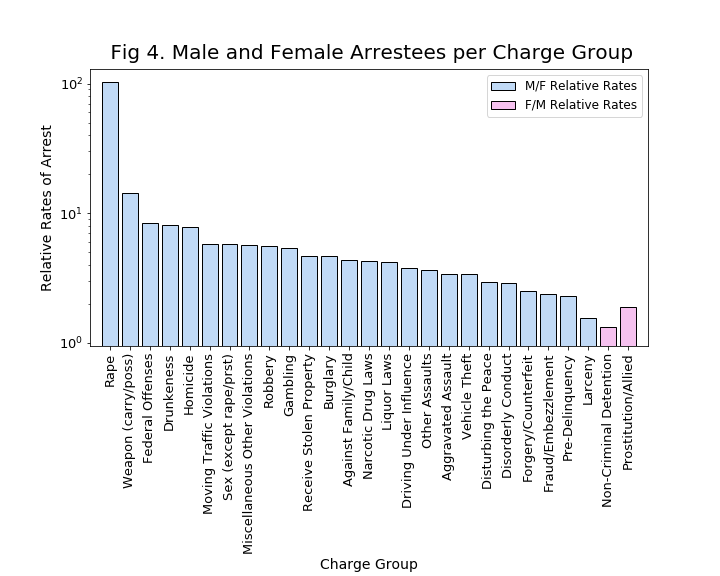

In [135]:
#  For details on the making of Figure 4, see "Figure 4. Relative Rates Bar Graph" below.
Image('M_F_Arrestees.png')

The presentation of the arrest data in Figure 3 and 4 above is problematic because it does not communicate for which crimes people are most commonly arrested. For example, while prostitution stands out in these figures as the charge with the highest fraction of female:male arrestees, information on the relative rates of arrest for prostitution verses other charges is not provided in these presentations of the data.  

In order to communicate the difference in arrest rates for both charge group and sex, this data is presented in pie plot form (Figure 5). The plots in Fig 5 A and B show the conditional probability of various crimes given that the arrestees are male and female, respectively. For example, the yellow slice in Fig 5A represents the probability that an arrestee is charged with Narcotic Drug Law (NDL) violation given that the arrestee is Male:

$$ \mathbb{P}(NDL\mid Male) = \frac{\mathbb{P}(Male, NDL)}{\mathbb{P}(Male)} $$
The areas of the pie plots have been scaled in order to express the higher rate of male arrests.

While the pie plots clearly show that for prostitution the rate of male arrest is lower than the rate of female, the pie plots also show that arrests for prostitution only account for ~10.1% of total female arrests. 

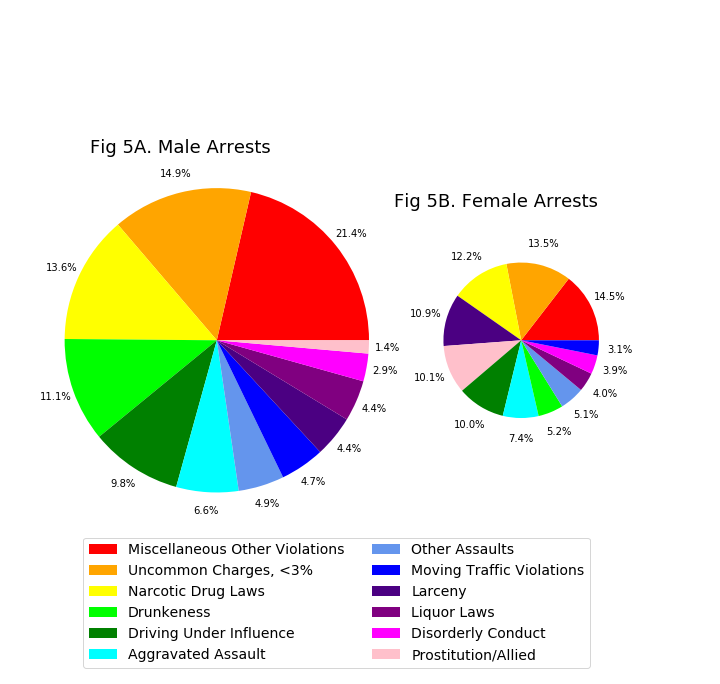

In [123]:
# For details on the making of Figure 5, see "Figure 5: Pie Plot" below.
Image('Charge_group_Pie.png')

# 3. Importing & Cleaning Data 

0. Import necessary modules/libraries.


1. Import arrest data file as dataframe. 
2. Create a column for "Arrest Datetime" objects from "Arrest Date" string objects, and select all bookings prior to Jan 01, 2019.
3. Create a dataframe columns for day, month, year, and weekday.


4. Define functions for converting "Location" string object into Latitude, Longitude, and Point (Long, Lat) shape objects.
5. Create "Latitude", "Longitude", and Point Coordinates ("point_Coor") columns in the bookings_df. 


6. (Optional) Save bookings_df as pickle file for easy uploading in the future.
7. (Optional) Load bookings_df from pickle file


ARREST DATA SUMMARY: Among other data, this cleaned bookings_df dataframe includes the following information of interest: arrest location (Point object, Latitude, Longitude), arrestee age and sex, charge description, and arrest date (datetime, year, month, day).

In [2]:
#0
import pandas as pd
import numpy as np
import datetime
import re
import math
import pickle

import scipy as sp
from scipy import stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.cbook as cbook
#import seaborn as sns
#sns.set()
from descartes import PolygonPatch

import geopandas
from shapely.geometry import Point, LineString, Polygon, MultiPolygon
matplotlib.rcParams['figure.dpi'] = 144

from IPython.display import Image

In [4]:
#1
#Arrest_data_file = "Arrest_Data_from_2010_to_Present.csv"
Arrest_data_file = r"C:\Users\J Peper\Peper_Fun\TDI_Challenge_2019\Arrest_Data_from_2010_to_Present.csv"


#2
bookings_df_raw = pd.read_csv(Arrest_data_file)
bookings_df_raw["Arrest Datetime"] = bookings_df_raw[["Arrest Date"]].applymap(lambda date: datetime.datetime.strptime(date, '%m/%d/%Y'))

jan_01_2019 = datetime.datetime.strptime("01/01/2019", '%m/%d/%Y')  
bookings_df = bookings_df_raw[bookings_df_raw["Arrest Datetime"] < jan_01_2019].copy()


#3
bookings_df["Year"] = bookings_df[["Arrest Datetime"]].applymap(lambda datetime: datetime.year)
bookings_df["Month"] = bookings_df[["Arrest Datetime"]].applymap(lambda datetime: datetime.month)
bookings_df["Day"] = bookings_df[["Arrest Datetime"]].applymap(lambda datetime: datetime.day)
bookings_df["Weekday"] = bookings_df[["Arrest Datetime"]].applymap(lambda date: date.weekday())

In [5]:
#4
def String_to_Point_Shape_object(Location):
    regex = re.compile("\((\-?\d+.\d*), (\-?\d+.\d*)\)")
    m = regex.match(Location)
    if m:
        Latitude = float(m.group(1))
        Logitude = float(m.group(2))
    return (Point(Logitude, Latitude))

def String_to_Lat(Location):
    regex = re.compile("\((\-?\d+.\d*), (\-?\d+.\d*)\)")
    m = regex.match(Location)
    if m:
        Latitude = float(m.group(1))
        #Logitude = float(m.group(2))
    return (Latitude)

def String_to_Long(Location):
    regex = re.compile("\((\-?\d+.\d*), (\-?\d+.\d*)\)")
    m = regex.match(Location)
    if m:
        #Latitude = float(m.group(1))
        Logitude = float(m.group(2))
    return (Logitude)


#5
bookings_df = bookings_df[(bookings_df["Location"].notna())
                          & (bookings_df["Location"] != "(0.0, 0.0)")].copy()   # Exclude bookings without location data

bookings_df["Point_Coor"] = bookings_df[["Location"]].applymap(lambda x: String_to_Point_Shape_object(x))
bookings_df["Latitude"] = bookings_df[["Location"]].applymap(lambda x: String_to_Lat(x))
bookings_df["Longitude"] = bookings_df[["Location"]].applymap(lambda x: String_to_Long(x))

In [3]:
#6
#with open('bookings_df.p', 'wb') as f:
#    pickle.dump(bookings_df, f)
 
    
#7
with open('bookings_df.p', 'rb') as f:
    bookings_df = pickle.load(f)

In [7]:
# ARREST DATA SUMMARY
bookings_df[['Report ID', 'Age', 'Sex Code', 'Charge Group Description', 'Arrest Datetime','Point_Coor', 'Latitude', 'Longitude']].head(2)

,Report ID,Age,Sex Code,Charge Group Description,Arrest Datetime,Point_Coor,Latitude,Longitude
0,4248313,37,M,Burglary,2015-02-24,POINT (-118.314 34.0653),34.0653,-118.3140
2,4254777,22,M,Larceny,2015-02-26,POINT (-118.4488 34.2216),34.2216,-118.4488


# 4. Statistical Analysis:

For each booking in the data set, information on the **sex** (M of F in "Sex Code") and **charge** ("Charge Group Description") is given, where charge represents the crime the arrestee is charged with, e.g. homicide, burglary, driving under influence, etc. 

Are males and females arrested for (or charged with) different crimes? To answer this question, I will evaluate  the following hypothesis for all 28 charge group categories:

$H_0$: **Charge group** has the same proportion of male arrestees as the **global bookings dataset** (~79% Male, 21% Female).

example: % Male for all driving under influence bookings == 79%.


$H_1$: **Charge group** has a lower (or higher) proportion of % Male arrestees than the **global booking dataset**.

example: % Male for all driving under influence bookings < (or >) 79%.

### Evaluate Sex Code as a Bernoulli Random Variable:
Because arrestee sex is a trail with 2 binary outcomes (M or F), I will assume the underlying variable is Bernoulli.

In order to perform statistical analysis, the Male (M) and Female (F) sex codes will arbitrarily be assigned to 1 and 0 respectively. 
8. The Bernoulli sex value will be added to the bookings_df dataframe under "Sex_Code_Bernoulli".
example: % Male for all driving under influence bookings < (or >) 79%.

In [4]:
#8
def Sex_to_Bernoulli(sex_code):
    if sex_code == "M":
        return(1)
    if sex_code == "F":
        return(0)
    
bookings_df["Sex_Code_Bernoulli"] = bookings_df[["Sex Code"]].applymap(lambda sex_code: Sex_to_Bernoulli(sex_code))

9. Group bookings by "Charge Group Description".
10. For each charge group, the group mean of the sex code bernoulli, group size, and standard error of the group mean are calculated and stored in a new dataframe (charge_group_df).

In [5]:
#9
charge_groups = bookings_df.groupby("Charge Group Description")


#10
global_sex_mean = bookings_df["Sex_Code_Bernoulli"].mean()
global_sex_std = np.sqrt(global_sex_mean*(1-global_sex_mean))

charge_group_dist = {}
for charge, df in charge_groups:
    df_n = df.shape[0]
    df_sex_mean = df.Sex_Code_Bernoulli.mean()
    df_std_error_or_mean = np.sqrt((global_sex_mean*(1-global_sex_mean))/df_n)
    df_z_score = (df_sex_mean-global_sex_mean)/df_std_error_or_mean
    charge_group_dist[charge] = [df_sex_mean, df_n, df_std_error_or_mean, df_z_score]

charge_group_df = pd.DataFrame.from_dict(charge_group_dist,orient = "index", columns = ["sex_mean","sample_size", "std_error_of_mean", "z_score"])
charge_group_df.head(2)

,sex_mean,sample_size,std_error_of_mean,z_score
Against Family/Child,0.813385,6500,0.005036,4.282217
Aggravated Assault,0.773423,77947,0.001454,-12.650596


The resulting %Male (blue bar) and %Female (pink bar) are plotted for each charge group in Fig. 1 below along with the global %Male mean (black dashed). The fraction of male arrestees for each charge group differ from the global value.

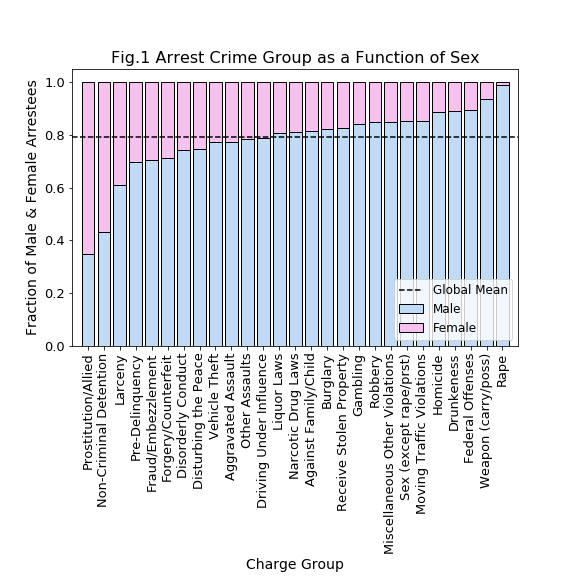

In [167]:
#See Fig. 1 details under the header "Figure 1: Sex Code Bar Graph" below.
Image('Crime_group_Sex_BAR.png')

### Evaluating the null hypothesis:
$H_0$: Charge group has the same proportion of male arrestees as the global bookings dataset (~79% Male, 21% Female).

If $H_0$ is true, it is unlikely to observe a %Male mean much larger or smaller than the global %Male. In order to determine if the differences between charge group %Male and the global %Male are statistically significant, I will calculate the p-value for each charge group. The calculated p-values will be evaluated against a probability threshold of 1% ($\alpha = 0.01$):

$H_0$ is **true** if p-value $>$ 0.01.(The probability of observing the %male mean of the charge group is greater than 1%).

$H_0$ is **false** if p-value <= 0.01. (The probability of observing the %male mean of the charge group is <= 1%).  

#### P-Value Calculation:
P-value is the probability of observing a %male value equal to or more extreme than that of our charge group sample assuming that the null hypothesis is true. The p-value will be calculated in two ways:


***Method 1:*** *p-value calculated using the Central Limit Theorem (Fig 2A and B below):* When sample size, $n$, is large, the sampling distribution of the sample mean ($\overline X$) (where sample represents $n$ observations from a population with true mean $\mu$) is distributed normally around $\mu$ with variance equal to the standard error of the sample mean ($SE$) squared, **eq 1, Fig 2A**. As we are estimating the success rate (%Male) of the underlying Bernoulli variable, variance = p (1-p) and standard error (SE) is defined in eq 2.:


eq 1 $$ \overline X \sim N\left(\mu, SE^2 \right) $$
eq 2 $$ SE = \sqrt{\frac{p (1-p)}{n}} $$


Accordingly, the **p-value**, the probability of observing sample mean $\le$ $\overline X$ given the null hypothesis, is defined in **eq 3, Fig 2B**.

eq 3   p-Value =  $$\mathbb{P}(\overline X \le \mu) = N\left(\overline X \mid \mu, {\frac{p (1-p)}{n}}\right)$$



***Method 2:*** *p-value calculated using the Binomial Distribution (Fig 2C and D below):* Because a series of Bernoulli trails is a binomial random variable (**Fig 2C**), (1) the sampling distribution can be estimated with a binomial distribution (with success rate (% male) p and sample size n) and (2) the p-value can also be calculated from the binomial cumulative distribution function (**Fig 2D**). 

**These calculations are demonstrated in Figure 2 below for the "driving under influence" charge group (n = 112812, p = 0.79).**

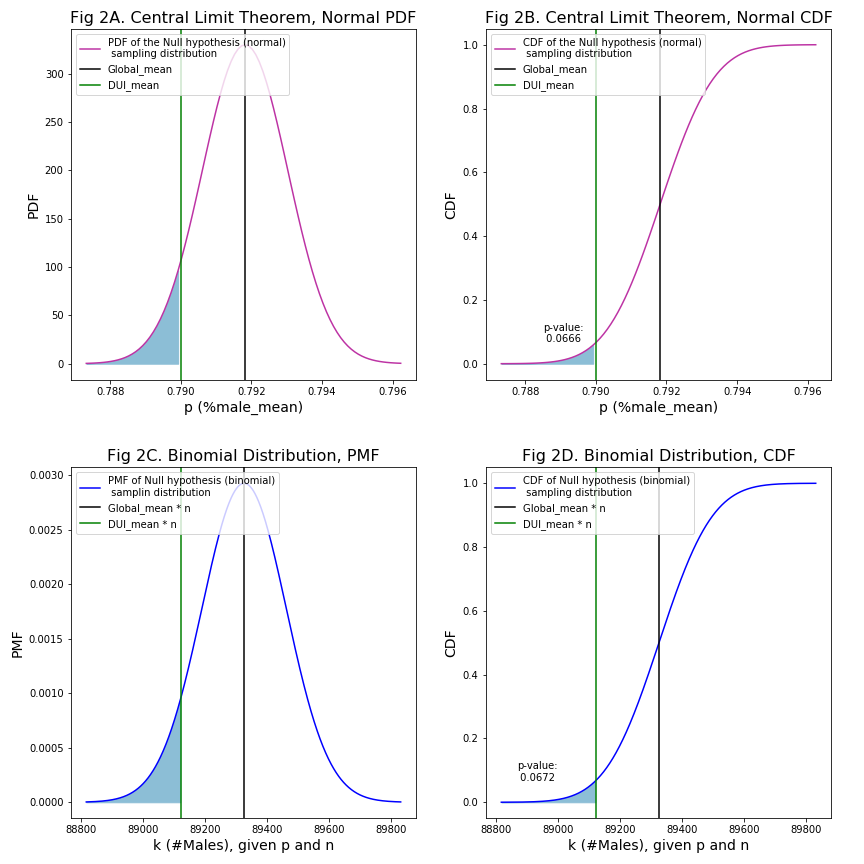

In [39]:
#See Fig. 2 details under the header "Figure 2: P-Value_DUI" below.
Image('Normal_and_binomial.png')

11. Calculate p-value using Method 1.
12. Calculate p-value using Method 2.
13. Assign True or False to $H_0$ column in dataframe based on p-value and $\alpha = 0.01$.
14. Compile list of charge groups where $H_0$ is True and False.

In [104]:
global_sex_mean = bookings_df["Sex_Code_Bernoulli"].mean()

#11
for each in charge_group_df.itertuples():
    CLT_norm = sp.stats.norm(loc = global_sex_mean, scale = each.std_error_of_mean)
    if each.sex_mean < global_sex_mean:
        P_val = CLT_norm.cdf(each.sex_mean)
    if each.sex_mean > global_sex_mean:
        P_val = 1 - CLT_norm.cdf(each.sex_mean)
    charge_group_df.loc[each.Index, "CLT_P_Val"] = P_val
    
#12
for each in charge_group_df.itertuples():
    each_n = each.sample_size
    each_p = each.sex_mean
    Binom_dist = sp.stats.binom(each_n, global_sex_mean)
    if each.sex_mean < global_sex_mean:
        P_val = Binom_dist.cdf(each_n*each_p)
    if each.sex_mean > global_sex_mean:
        P_val = 1 - Binom_dist.cdf(each_n*each_p)
    charge_group_df.loc[each.Index, "Binomial_P_Val"] = P_val
    
#13
charge_group_df["H_null"] = charge_group_df[["Binomial_P_Val"]].applymap(lambda p_val: True if p_val > 0.01 else False)

#14
Null_is_True = charge_group_df[charge_group_df["H_null"] == True].index.tolist()
print("H_null is True for the following charge groups: ")
for item in Null_is_True:
    print(item)

Null_is_False = charge_group_df[charge_group_df["H_null"] == False].index.tolist()
print("\nH_nul is False for the following charge groups: ")
for each in Null_is_False:
    print(each)

H_null is True for the following charge groups: 

H_nul is False for the following charge groups: 
Against Family/Child
Aggravated Assault
Burglary
Disorderly Conduct
Disturbing the Peace
Driving Under Influence
Drunkeness
Federal Offenses
Forgery/Counterfeit
Fraud/Embezzlement
Gambling
Homicide
Larceny
Liquor Laws
Miscellaneous Other Violations
Moving Traffic Violations
Narcotic Drug Laws
Non-Criminal Detention
Other Assaults
Pre-Delinquency
Prostitution/Allied
Rape
Receive Stolen Property
Robbery
Sex (except rape/prst)
Vehicle Theft
Weapon (carry/poss)


### Conclusion:
**$H_0$ is only true for the charge category "Driving Under Influence".**

**$H_0$ is False for the remaining 27 categories.** For these charge categories, we can estimate the charge group mean %Male ($\overline X$) with 95% confidence using the 2$\sigma$ confidence interval (eq 4). In eq 4, standard deviation (generally $\sigma$) is equal to the standard error of the sample mean (SE, see eq 2 above): 

eq 4:    $$[\overline X - 2(SE),  \overline X + 2(SE)] \$$

15. Calculate the 2$\sigma$ confidence interval for the mean %Male for each charge group. 
16. Re-plot the bar graph of %Male and %Female for charge group with the 2-sigma confidence interval included as error bars (Fig 3). See details for Fig. 3 below (Figure 3: Sex Code Bar Graph w/ 2sigma).


In [129]:
charge_group_df.head(2)

,sex_mean,sample_size,std_error_of_mean,z_score,CLT_P_Val,Binomial_P_Val,H_null,Conf_Int
Against Family/Child,0.813385,6500,0.005025,4.044646,2.620110e-05,1.989806e-05,False,"[0.8033350405674416, 0.8234341902017891]"
Aggravated Assault,0.773423,77947,0.001451,-13.533999,4.925741e-42,3.998286e-41,False,"[0.7705209184048771, 0.7763250153706369]"


In [128]:
#15
charge_group_df['Conf_Int'] = np.nan
charge_group_df['Conf_Int'] = charge_group_df['Conf_Int'].astype(object)

for charge in charge_group_df.itertuples():
    X_bar = charge.sex_mean
    SE = charge.std_error_of_mean
    n = charge.sample_size
    conf_int = [X_bar-2*SE, X_bar+2*SE]
    if conf_int[1] > 1.0:
        conf_int = [X_bar-(3/n), 1.0]
    charge_group_df.at[charge.Index, "Conf_Int"] = conf_int

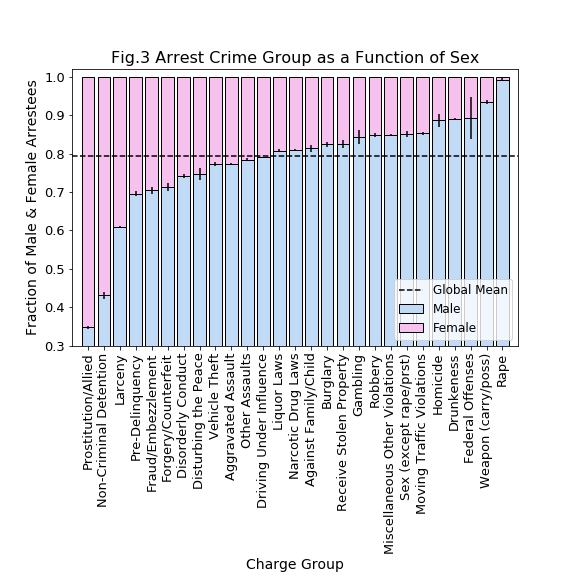

In [127]:
#16
#See details for Fig. 3 below (Figure 3: Sex Code Bar Graph w/ 2sigma).
Image("Crime_group_Sex_BAR_2sigma.png")

# 5. Plots:

### Figure 1: Sex Code Bar Graph

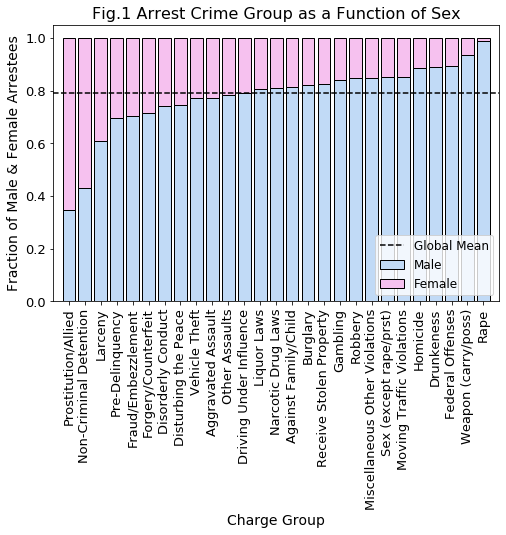

In [118]:
# Bar Data:
bar_names = charge_group_df.sort_values("sex_mean").index.tolist()
bar_num = list(range(len(bar_names)))
male_bar = charge_group_df.sort_values("sex_mean")['sex_mean'].tolist()
female_bar = [1 - x for x in charge_group_df.sort_values("sex_mean")['sex_mean'].tolist()]

# Create Plot:
fig, ax = plt.subplots(figsize=(8,8))

# Create male_bar, female_bar, global_mean_line:
ax.bar(bar_num, male_bar, color='#c1daf6', edgecolor='black', width=0.8, label = "Male")
ax.bar(bar_num, female_bar, bottom=male_bar, color='#f6c1ef', edgecolor='black', width=0.8, label = "Female")
ax.plot([-1, 27], [global_sex_mean, global_sex_mean], "k--")

# Axis Limits, labels, title
ax.set_xlim(left = -1, right = 27)
plt.xticks(bar_num, bar_names, rotation=90, fontsize = 13)
plt.yticks(fontsize = 13)
ax.set_title("Fig.1 Arrest Crime Group as a Function of Sex", fontsize = 16)
ax.set_xlabel('Charge Group', fontsize = 14)
ax.set_ylabel('Fraction of Male & Female Arrestees', fontsize = 14)
ax.legend(["Global Mean", "Male", "Female"], loc = 4, fontsize = 12)


plt.gcf().subplots_adjust(bottom=.4)
fig.savefig('Crime_group_Sex_BAR.png')
#Image('Crime_group_Sex_BAR.png')

### Figure 2: P-Value_DUI

CLT Normal distribution gives p_value = 0.0665896211979943
Binomial distribution gives p_value = 0.0671793340925428


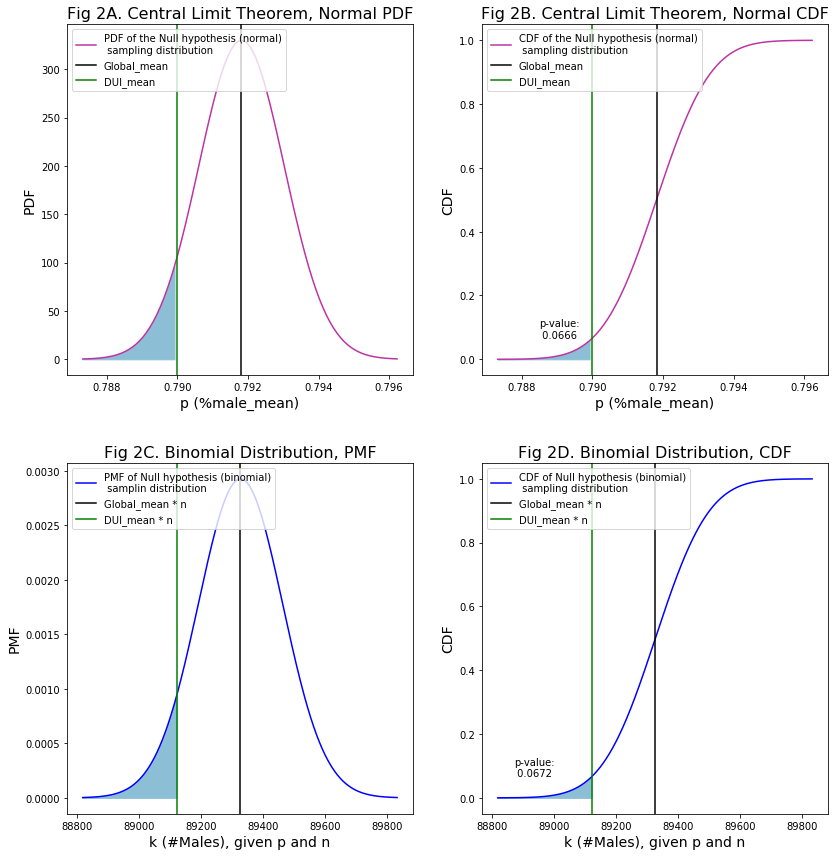

In [38]:
# Define Parameters (p = probability of success (% male), n = sample size)
p = global_sex_mean     # Global Mean
sam_p = charge_group_df["sex_mean"].loc["Driving Under Influence"]    # probability of success (%male) for DUI arrests
n = charge_group_df["sample_size"].loc["Driving Under Influence"]    # Sample Size = numver of DUI Arrests
standard_error = charge_group_df["std_error_of_mean"].loc["Driving Under Influence"]    # Standard Error of Sample Mean

###

# Create plot with 4 subplots:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(12, 12, forward=True)

###

# Method 1 Central Limit Theorem: Plot the Normal Distribution PDF and CDF:
CLT_norm = sp.stats.norm(loc = p, scale = standard_error)
x_CLT_norm = np.arange(CLT_norm.ppf(0.0001), CLT_norm.ppf(0.9999), 0.0001)

# Plot [0,0]
axs[0,0].plot(x_CLT_norm, CLT_norm.pdf(x_CLT_norm), color = "#BD33A4", label = "PDF of the Null hypothesis (normal)\n sampling distribution")
axs[0,0].axvline(p, c = "k", label = "Global_mean")
axs[0,0].axvline(sam_p, c = "g", label = "DUI_mean")
axs[0,0].fill_between(x_CLT_norm[x_CLT_norm<sam_p], 0, CLT_norm.pdf(x_CLT_norm)[x_CLT_norm<sam_p], color = "#8CBED6")
# Plot [0,0] axis, title, legend
axs[0,0].set_title("Fig 2A. Central Limit Theorem, Normal PDF", fontsize = 16)
axs[0,0].set_xlabel('p (%male_mean)', fontsize = 14)
axs[0,0].set_ylabel("PDF", fontsize = 14)
axs[0,0].legend(loc = 2)

# Plot [0,1]
axs[0,1].plot(x_CLT_norm, CLT_norm.cdf(x_CLT_norm), color = "#BD33A4", label = "CDF of the Null hypothesis (normal)\n sampling distribution")
axs[0,1].axvline(p, c = "k", label = "Global_mean")
axs[0,1].axvline(sam_p, c = "g", label = "DUI_mean")
P_val_CTL = CLT_norm.cdf(sam_p)
axs[0,1].fill_between(x_CLT_norm[x_CLT_norm<sam_p], 0, CLT_norm.cdf(x_CLT_norm)[x_CLT_norm<sam_p], color = "#8CBED6")
# Plot [0,1] axis, title, legend
axs[0,1].set_title("Fig 2B. Central Limit Theorem, Normal CDF", fontsize = 16)
axs[0,1].set_ylabel("CDF", fontsize = 14)
axs[0,1].set_xlabel('p (%male_mean)', fontsize = 14)
axs[0,1].legend(loc = 2)
axs[0,1].text(0.7885, 0.0665896211979943, "p-value:\n {:.3}".format(P_val_CTL))

###

# Method 2 Binomial Distributions: Plot the Binomial Distribution PMF and CDF:
binom_dist = sp.stats.binom(n, p)
x_binom = np.arange(binom_dist.ppf(0.0001), binom_dist.ppf(0.9999), 1)

# Plot [1,0]
axs[1,0].plot(x_binom, binom_dist.pmf(x_binom), c = "b", label = "PMF of Null hypothesis (binomial)\n samplin distribution")
axs[1,0].axvline(n*p, c = "k", label = "Global_mean * n")
axs[1,0].axvline(n*sam_p, c = "g", label = "DUI_mean * n")
axs[1,0].fill_between(x_binom[x_binom<(n*sam_p)], 0, binom_dist.pmf(x_binom)[x_binom<(n*sam_p)], color = "#8CBED6")
# Plot [1,0] axis, title, legend
axs[1,0].legend(loc = 2)
axs[1,0].set_xlabel('k (#Males), given p and n', fontsize = 14)
axs[1,0].set_ylabel('PMF', fontsize = 14)
axs[1,0].set_title("Fig 2C. Binomial Distribution, PMF", fontsize = 16)

# Plot [1,1]
axs[1,1].plot(x_binom, binom_dist.cdf(x_binom), c = "b",  label = "CDF of Null hypothesis (binomial)\n sampling distribution")
axs[1,1].axvline(n*p, c = "k", label = "Global_mean * n")
axs[1,1].axvline(n*sam_p, c = "g", label = "DUI_mean * n")
P_val_binom = binom_dist.cdf(n*sam_p)
axs[1,1].fill_between(x_binom[x_binom<(n*sam_p)], 0, binom_dist.cdf(x_binom)[x_binom<(n*sam_p)], color = "#8CBED6")
# Plot [1,1] axis, title, legend
axs[1,1].set_ylabel("CDF", fontsize = 14)
axs[1,1].set_xlabel('k (#Males), given p and n', fontsize = 14)
axs[1,1].set_title("Fig 2D. Binomial Distribution, CDF", fontsize = 16)
axs[1,1].legend(loc = 2)
axs[1,1].text(88870, 0.0665896211979943, "p-value:\n {:.3}".format(P_val_binom))

###

print("CLT Normal distribution gives p_value = " + str(P_val_CTL))
print("Binomial distribution gives p_value = " + str(P_val_binom))
plt.tight_layout()
# Modify/Save Plot
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 1   # the bottom of the subplots of the figure
top = 1      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.25  # the amount of height reserved for white space between subplots
fig.subplots_adjust(wspace=wspace, hspace=hspace)

fig.savefig('Normal_and_binomial.png')

### Figure 3: Sex Code Bar Graph w/ 2sigma
Create a bar graph analogous to Figure 1 with the addition of the 2$\sigma$ confidence interval as vertical error bars.

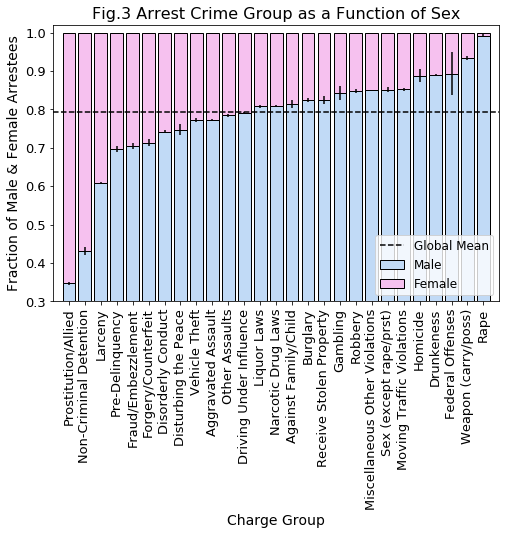

In [130]:
# Create Plot:
fig, ax = plt.subplots(figsize=(8,8))

# Bar Data:
bar_names = charge_group_df.sort_values("sex_mean").index.tolist()
bar_num = list(range(len(bar_names)))
male_bar = charge_group_df.sort_values("sex_mean")['sex_mean'].tolist()
female_bar = [1 - x for x in charge_group_df.sort_values("sex_mean")['sex_mean'].tolist()]

# Create Error bars based on confidence interval:
error_bars = []
conf_int = charge_group_df.sort_values("sex_mean")['Conf_Int'].tolist()
for idx, item in enumerate(male_bar):
    low = item - conf_int[idx][0]
    high = conf_int[idx][1] - item
    error_bars.append([low, high])
error_bars = np.asarray(error_bars)
error_bars = np.transpose(error_bars)


# Plot male_bar, female_bar, global_mean_line:
ax.bar(bar_num, male_bar, color='#c1daf6', edgecolor='black', width=0.8, label = "Male", yerr = error_bars)
ax.bar(bar_num, female_bar, bottom=male_bar, color='#f6c1ef', edgecolor='black', width=0.8, label = "Female")
ax.plot([-1, 27], [global_sex_mean, global_sex_mean], "k--")
ax.legend(["Global Mean", "Male", "Female"], loc = 4, fontsize = 12)

# Axis Limits, labels, title
ax.set_xlim(left = -1, right = 27)
plt.xticks(bar_num, bar_names, rotation=90, fontsize = 13)
plt.yticks(fontsize = 13)
ax.set_title("Fig.3 Arrest Crime Group as a Function of Sex", fontsize = 16)
ax.set_xlabel('Charge Group', fontsize = 14)
ax.set_ylabel('Fraction of Male & Female Arrestees', fontsize = 14)
ax.legend(["Global Mean", "Male", "Female"], loc = 4, fontsize = 12)
ax.set_ylim(bottom = .3, top = 1.02)
ax.legend(["Global Mean", "Male", "Female"], loc = 4, fontsize = 12)

plt.gcf().subplots_adjust(bottom=.4)
fig.savefig('Crime_group_Sex_BAR_2sigma.png')

### Figure 4. Relative Rates Bar Graph:
**1.** Create a new dataframe (M_and_F_charge_group_df) which include the following information for each charge group:
- number (n) of Female arrestees for each Charge Group 
- Conditional probability of each Charge Group given sex = Female, exp: P(Homicide | Female)
- Probability of Charge Group and Female exp: P(Homicide & Female)
- number (n) of Male arrestees for each Charge Group
- Conditional probability of each Charge Group given sex = Male
- Probability of Charge Group and Female
- Relative rates of male and female arrests for each charge group.

**2.** Create a bar graph of relative rates of male and female arrests for each charge group. 

In [43]:
# 1.

bookings_df = bookings_df[bookings_df["Charge Group Description"].notna() == True]
sex_groups = bookings_df.groupby("Sex Code")
global_n = bookings_df.shape[0]

#Female Only Arrests:
Female_bookings_df = sex_groups.get_group("F")
global_female_n = Female_bookings_df.shape[0]
Female_charge_group_dict = {}
for charge, charge_df in Female_bookings_df.groupby("Charge Group Description") :
    F_charge_n = charge_df.shape[0]
    P_charge_given_F = F_charge_n/global_female_n
    P_charge_and_F = F_charge_n/global_n
    Female_charge_group_dict[charge] = [F_charge_n, P_charge_given_F, P_charge_and_F]
Female_df = pd.DataFrame.from_dict(Female_charge_group_dict,orient = "index", columns = ["F_charge_n", "P_charge_given_F", "P_charge_and_F"])
    
# Male Only Arrests:
Male_bookings_df = sex_groups.get_group("M")
global_male_n = Male_bookings_df.shape[0]
Male_charge_group_dict = {}
for charge, charge_df in Male_bookings_df.groupby("Charge Group Description") :
    M_charge_n = charge_df.shape[0]
    P_charge_given_M = M_charge_n/global_male_n
    P_charge_and_M = M_charge_n/global_n
    Male_charge_group_dict[charge] = [M_charge_n, P_charge_given_M, P_charge_and_M]
Male_df = pd.DataFrame.from_dict(Male_charge_group_dict,orient = "index", columns = ["M_charge_n", "P_charge_given_M", "P_charge_and_M"])

# Combine Male and Female Dataframes, create the relative rates columns, and sort by M/F relative rates:
M_and_F_charge_group_df = pd.concat([Female_df, Male_df], axis = 1)
M_and_F_charge_group_df["M/F_Rates"] = M_and_F_charge_group_df["M_charge_n"]/M_and_F_charge_group_df["F_charge_n"]
M_and_F_charge_group_df["F/M_Rates"] = M_and_F_charge_group_df["F_charge_n"]/M_and_F_charge_group_df["M_charge_n"]
M_and_F_charge_group_df = M_and_F_charge_group_df.sort_values("F/M_Rates")
M_and_F_charge_group_df["Rel_Rates_Sigma"] = M_and_F_charge_group_df["M/F_Rates"]

###
RR_Rape_sigma = RR_Rape*np.sqrt((M_std_error_Rape/M_Rape)**2*(F_std_error_Rape/F_Rape)**2) # Error propagation
###
M_and_F_charge_group_df.head(2)

NameError: name 'RR_Rape' is not defined

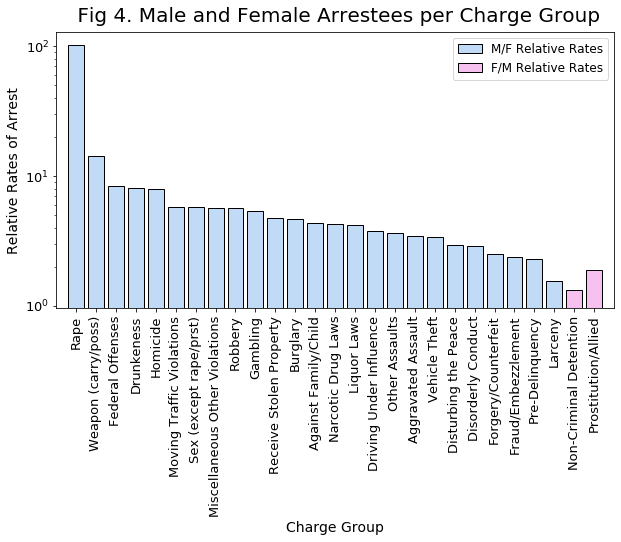

In [134]:
# 2. 

# Make figure, set axes, title, legend:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_title(" Fig 4. Male and Female Arrestees per Charge Group", fontsize = 20, pad = 10)
ax.set_xlabel('Charge Group', fontsize = 14)
ax.set_ylabel('Relative Rates of Arrest', fontsize = 14)
ax.set_xlim(left = -1, right = 27)

width = 0.8
Bar_num = list(range(len(M_and_F_charge_group_df.index.tolist())))
Bar_labels = M_and_F_charge_group_df.index.tolist()
plt.xticks(Bar_num, Bar_labels, rotation=90, fontsize = 13)
plt.yticks(fontsize = 13)
ax.set_yscale("log")


# Make relative rates bars:
M_F_rel_rates_bar = []
F_M_rel_rates_bar = []
for i, row in M_and_F_charge_group_df.iterrows():
    if row["M/F_Rates"] > 1:
        M_F_rel_rates_bar.append(row["M/F_Rates"])
        F_M_rel_rates_bar.append(0)
    if row["M/F_Rates"] < 1:
        M_F_rel_rates_bar.append(0)
        F_M_rel_rates_bar.append(row["F/M_Rates"])
    
# Plot Male and Female Bars:
ax.bar(Bar_num, M_F_rel_rates_bar, color='#c1daf6', edgecolor='black', width=width, label = "M/F Relative Rates")
ax.bar(Bar_num, F_M_rel_rates_bar, color='#f6c1ef', edgecolor='black', width=width, label = "F/M Relative Rates")
ax.legend(loc = 1, fontsize = 12)
plt.gcf().subplots_adjust(bottom=.4)


# Save Figure
fig.savefig('M_F_Arrestees.png')
#Image('M_F_Arrestees.png')

### Figure 5: Pie Plot
1. In a trimmed version of the dataframe created above (M_and_F_charge_group_TRIM), consolidate charge groups accounting for fewer than 3% of Male and Female arrests into a charge group titled “Uncommon Charges, <3%”. 

2. For Male and Female arrests, create a pie plot which shows the conditional probability of each charge group given the sex of the arrestee, for example:

$$ \mathbb{P}(Homicide\mid Male) = \frac{\mathbb{P}(Male, Homicide)}{\mathbb{P}(Male)} $$

Scale the area of the female pie chart to represent the higher rate of male arrestees.

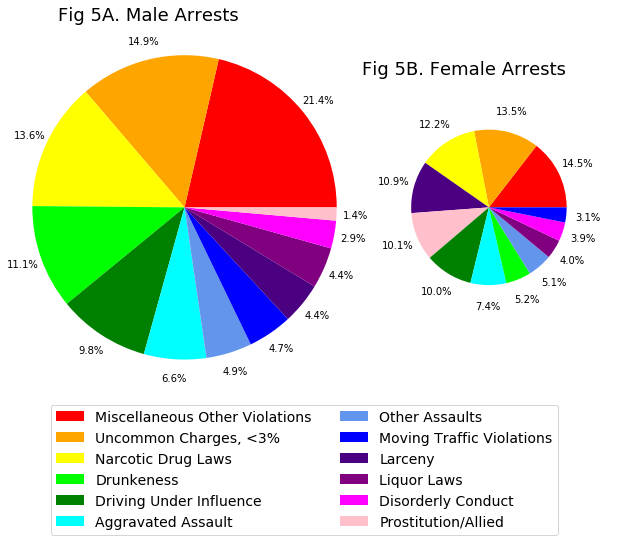

In [85]:
# 1.
M_and_F_charge_group_TRIM = M_and_F_charge_group_df[(M_and_F_charge_group_df["P_charge_given_F"] >0.03)
                                                   |(M_and_F_charge_group_df["P_charge_given_M"] >0.03)].copy()

Uncommon_crimes_df = M_and_F_charge_group_df[(M_and_F_charge_group_df["P_charge_given_F"] <=0.03) & (M_and_F_charge_group_df["P_charge_given_M"] <= 0.03)]
F_charge_n = Uncommon_crimes_df["F_charge_n"].sum()
P_charge_given_F = Uncommon_crimes_df["P_charge_given_F"].sum()
P_charge_and_F = Uncommon_crimes_df["P_charge_and_F"].sum()
M_charge_n = Uncommon_crimes_df["M_charge_n"].sum()
P_charge_given_M = Uncommon_crimes_df["P_charge_given_M"].sum()
P_charge_and_M = Uncommon_crimes_df["P_charge_and_M"].sum()
M_F_Rates = M_charge_n/F_charge_n
F_M_Rates = F_charge_n/M_charge_n

M_and_F_charge_group_TRIM.loc["Uncommon Charges, <3%"] = [F_charge_n, P_charge_given_F, P_charge_and_F, M_charge_n, P_charge_given_M, P_charge_and_M, M_F_Rates, F_M_Rates]

M_and_F_charge_group_TRIM = M_and_F_charge_group_TRIM.sort_values("P_charge_given_M", ascending = False)
colors  = ["red", "orange", "yellow", "lime", "green", "cyan", "cornflowerblue", "blue", "indigo", "purple", "fuchsia", "pink"]
M_and_F_charge_group_TRIM["colors"] = colors
M_and_F_charge_group_TRIM



# 2.
from matplotlib import cm
import matplotlib.colors as mcolors

# Make figure and axes
fig, ax = plt.subplots(1, 2, figsize=(10,9.5))
r = 1.5
F_to_M_ratio = np.sqrt(M_and_F_charge_group_TRIM["F_charge_n"].sum()/M_and_F_charge_group_TRIM["M_charge_n"].sum())

# Make Male Pie Chart:
Male_fracs = M_and_F_charge_group_TRIM["P_charge_given_M"].tolist()
Male_title = "Fig 5A. Male Arrests"
Male_colors = M_and_F_charge_group_trim["colors"].tolist()
Male_and_Female_labels = M_and_F_charge_group_TRIM.index.tolist()
ax[0].pie(Male_fracs, colors = Male_colors, autopct='%0.1f%%', pctdistance= (r*.75), radius = r)
ax[0].set_title(Male_title, fontsize = 18, pad = 60, loc = "left")
ax[0].legend(Male_and_Female_labels, loc = 1, fontsize = 14, ncol =2, bbox_to_anchor = (2.0, -.25))

# Make Female Pie Chart:
Female_title = "Fig 5B. Female Arrests"
Female_colors = M_and_F_charge_group_TRIM.sort_values("P_charge_given_F", ascending = False)["colors"].tolist()
Female_fracs = M_and_F_charge_group_TRIM.sort_values("P_charge_given_F", ascending = False)["P_charge_given_F"].tolist()
ax[1].pie(Female_fracs, colors = Female_colors,autopct='%0.1f%%',pctdistance = r*.85, radius = r*F_to_M_ratio)
ax[1].set_title(Female_title, fontsize = 18, loc = "left")

# Save Figure
fig.savefig('Charge_group_Pie.png')
#Image('Charge_group_Pie.png')